In [2]:
import torch
import torchvision
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [5]:
trainset = torchvision.datasets.CIFAR10(root='./data',train=True,download=False)
testset = torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transform)
trainset

Files already downloaded and verified


Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train

In [73]:
trainloader = torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True,num_workers=2)
testloader = torch.utils.data.DataLoader(testset,batch_size=64,shuffle=False,num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

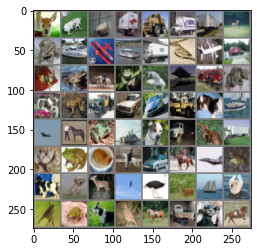

 deer   dog  bird truck


In [74]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [91]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        #x = torch.flatten(x)
        x = x.view(-1,16*5*5)
        #print(x.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()


net.to(device)
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [92]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())


In [93]:
for epoch in range(10):
    running_loss = 0.0
    for i,data in enumerate(trainloader,0):
        input, label = data[0].to(device), data[1].to(device)
        #print(label.shape,input.shape)
        optimizer.zero_grad()
        outputs = net(input)
        loss = criterion(outputs,label)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
     
        if i%200 == 199:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            running_loss = 0.0


[1,   200] loss: 1.919
[1,   400] loss: 1.662
[1,   600] loss: 1.550
[2,   200] loss: 1.397
[2,   400] loss: 1.386
[2,   600] loss: 1.342
[3,   200] loss: 1.271
[3,   400] loss: 1.263
[3,   600] loss: 1.222
[4,   200] loss: 1.178
[4,   400] loss: 1.159
[4,   600] loss: 1.145
[5,   200] loss: 1.089
[5,   400] loss: 1.087
[5,   600] loss: 1.081
[6,   200] loss: 1.048
[6,   400] loss: 1.022
[6,   600] loss: 1.029
[7,   200] loss: 0.991
[7,   400] loss: 0.991
[7,   600] loss: 0.987
[8,   200] loss: 0.954
[8,   400] loss: 0.956
[8,   600] loss: 0.963
[9,   200] loss: 0.921
[9,   400] loss: 0.902
[9,   600] loss: 0.918
[10,   200] loss: 0.875
[10,   400] loss: 0.889
[10,   600] loss: 0.891


In [94]:
PATH = './model/cifar_net.pth'
torch.save(net.state_dict(), PATH)

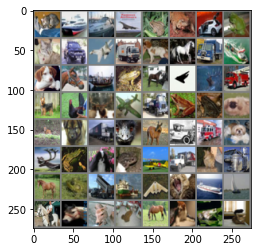

GroundTruth:    cat  ship  ship plane


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x0000023F9D6020D8>
Traceback (most recent call last):
  File "D:\SoftInstall\Anaconda3\envs\pytorch\lib\site-packages\torch\utils\data\dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "D:\SoftInstall\Anaconda3\envs\pytorch\lib\site-packages\torch\utils\data\dataloader.py", line 1295, in _shutdown_workers
    if self._persistent_workers or self._workers_status[worker_id]:
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'


In [95]:

dataiter = iter(testloader)
images,labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [96]:
net = Net()
net.load_state_dict(torch.load(PATH))
outputs = net(images)

In [97]:
val, pre = torch.max(outputs,1)
print(val,pre)

tensor([1.9972, 6.6845, 3.2633, 2.4251, 3.2969, 3.2605, 3.1126, 4.3153, 2.2292,
        5.1476, 3.3370, 7.1646, 1.9302, 8.2412, 5.6419, 2.2614, 3.8940, 1.8587,
        7.7271, 1.8611, 7.0715, 5.1073, 2.6128, 8.1619, 4.2856, 1.7708, 2.8030,
        2.1550, 4.0262, 5.3511, 2.8642, 2.2242, 1.3091, 2.7583, 3.7207, 0.4002,
        5.8444, 3.5199, 6.4816, 6.0410, 1.4725, 5.9298, 4.4987, 3.3897, 5.0405,
        4.4937, 3.0839, 1.1466, 5.8697, 2.8754, 3.0441, 1.8642, 2.1942, 2.9586,
        6.6060, 2.9276, 2.9999, 0.5975, 2.1785, 1.8240, 7.4409, 3.1794, 0.4857,
        1.2588], grad_fn=<MaxBackward0>) tensor([3, 8, 1, 0, 4, 6, 1, 6, 3, 1, 4, 9, 4, 7, 1, 6, 5, 7, 8, 6, 7, 2, 4, 9,
        4, 3, 4, 4, 9, 6, 6, 5, 4, 5, 9, 3, 7, 9, 9, 5, 4, 6, 7, 6, 0, 9, 4, 7,
        7, 2, 7, 8, 6, 3, 0, 8, 5, 5, 5, 3, 7, 5, 7, 2])


In [98]:
print('Predicted: ', ' '.join('%5s' % classes[pre[j]]
                              for j in range(4)))

Predicted:    cat  ship   car plane


In [99]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _,pre = torch.max(outputs.data,1)
        total += labels.size(0)
        correct+=(pre == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 62 %


In [100]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 73 %
Accuracy of   car : 82 %
Accuracy of  bird : 53 %
Accuracy of   cat : 32 %
Accuracy of  deer : 41 %
Accuracy of   dog : 52 %
Accuracy of  frog : 71 %
Accuracy of horse : 73 %
Accuracy of  ship : 62 %
Accuracy of truck : 67 %
